In [1]:
"""

I Exploration des donnees



    Analyse de Forme:
 
 
 
         .variable cible: SARS-Cov-2 exam result
         
         .ligne et colonne: (5644, 110)
         
         .types et variables: int , float , str 
             il y a principalement des resultats sanguin,viraux et urinaire
         
         .analyse de la qualite du dataset: 
             il y a beaucoup de vide, des donnees mal type



     
    Analyse de fond:
        
        
         .
         
         .
         
         .
         
         .



"""

'\n\nI Exploration des donnees\n\n\n\n    Analyse de Forme:\n \n \n \n         .variable cible: SARS-Cov-2 exam result\n         \n         .ligne et colonne: (5644, 110)\n         \n         .types et variables: int , float , str \n             il y a principalement des resultats sanguin,viraux et urinaire\n         \n         .analyse de la qualite du dataset: \n             il y a beaucoup de vide, des donnees mal type\n\n\n\n     \n    Analyse de fond:\n        \n        \n         .\n         \n         .\n         \n         .\n         \n         .\n\n\n\n'

In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from fonction_tp_covid import *


dataframe = pd.read_excel('dataset.xlsx') 
data_numpy= dataframe.to_numpy() 


# on supprime la colonne d'index des targets car inutile et genante
data_numpy= np.delete(data_numpy,0,1)

label_info={}
titre=[]

# on recupere les noms des colonnes
for x in dataframe : 
    titre.append(x)
titre=np.delete(titre,0)

list_tag = {}
list_tag['data_numpy']=data_numpy.shape

#affichage_label(data_numpy,titre)   

data_numpy = encodage(data_numpy)
#affiche_element(compteur_tableau(data_numpy,0,int),titre,data_numpy)  

data=data_numpy

data=suppr_col_vide (data,0,0.92)
data=suppr_lig_vide (data,0,1)
nblig = data[:,1].size                    
nbcol = data[1,:].size  

list_tag['data']=data.shape

#affiche_element(compteur_tableau(data,0,int),titre,data) 

positif,negatif=separation_des_targets(data,5)
list_tag['positif']=positif.shape
list_tag['negatif']=negatif.shape

target_stat={}
for cible in ['data','positif' ,'negatif'] : 
    for critere in ['sum','mean','var','std','ptp'] :        
        target_stat[cible+'_'+critere]=test_colonnes(eval(cible),critere)
        
name=compteur_tableau(data,0,int)
'''for x in range(0,nbcol):
    nom=titre[name['colonne']['index'][x]]
    print(nom,'\n')
    for critere in ['sum','mean','var','std','ptp'] :         
        print(critere,
              round(target_stat['data'+'_'+critere][x]),
              round(target_stat['positif'+'_'+critere][x]),
              round(target_stat['negatif'+'_'+critere][x]))
    print('\n')'''
    
for x in list_tag:
    print(x,list_tag[x])
    
index=name['colonne']['index']
for x in range(2,5):
    data=np.delete(data,2,1)
    index=np.delete(index,2)

data=np.delete(data,0,1)  
index=np.delete(index,0)
        
newtitre=[]
for x in index:
    newtitre.append(titre[x])    
df=pd.DataFrame(data,columns=newtitre)

data_numpy (5644, 110)
data (5644, 18)
positif (234, 18)
negatif (5410, 18)


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score,make_scorer
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score,validation_curve, GridSearchCV

0.9000708717221828


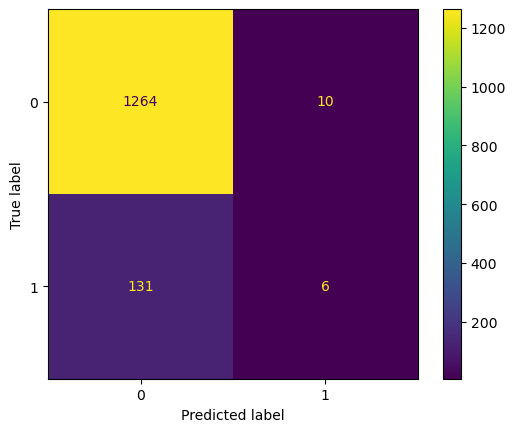

In [148]:
features=df.drop('SARS-Cov-2 exam result',axis=1,inplace=False)
target=df['SARS-Cov-2 exam result'].astype('int')

target_train,target_test,features_train,features_test=train_test_split(target,features)

robust_train=RobustScaler().fit_transform(features_train)
robust_test=RobustScaler().fit_transform(features_test)

model_forest=RandomForestClassifier(random_state=0)
model_forest.fit(robust_train,target_train.values.ravel())
print(model_forest.score(robust_test,target_test))
    
cm=confusion_matrix(target_test,model_forest.predict(robust_test),labels=model_forest.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_forest.classes_)
disp.plot()
plt.show()    


<Axes: >

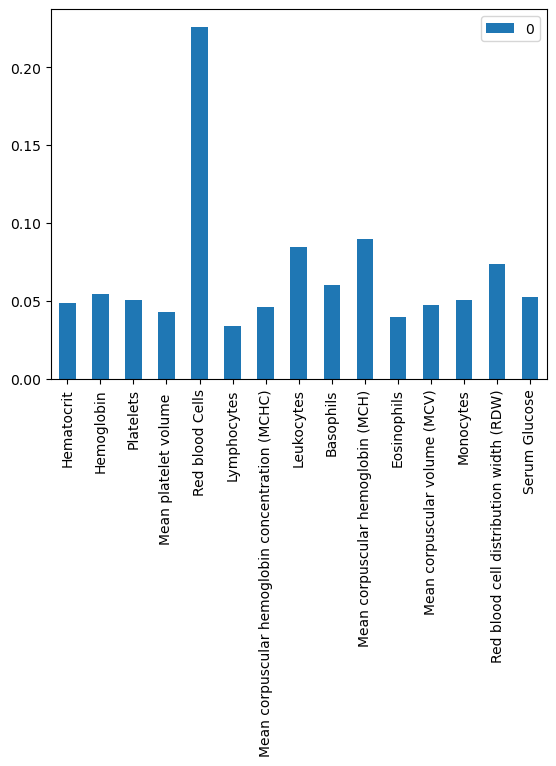

In [147]:
pd.DataFrame(model_forest.feature_importances_,index=features_train.columns).plot.bar()

In [ ]:
metrique=['accuracy','f1','f1_macro','f1_micro','recall','recall_macro','recall_micro','precision','precision_macro','precision_micro',]
scoring_forest=[]
robust_train=RobustScaler().fit_transform(features_train)
for x in metrique : 
    y = cross_val_score(RandomForestClassifier(random_state=0),robust_train,target_train.values.ravel(),cv=5,scoring=x).mean()
    scoring_forest.append(y)

print('scoring_forest\n')
for x in range(len( scoring_forest)) :
    print(metrique[x],scoring_forest[x])
    

<function matplotlib.pyplot.show(close=None, block=None)>

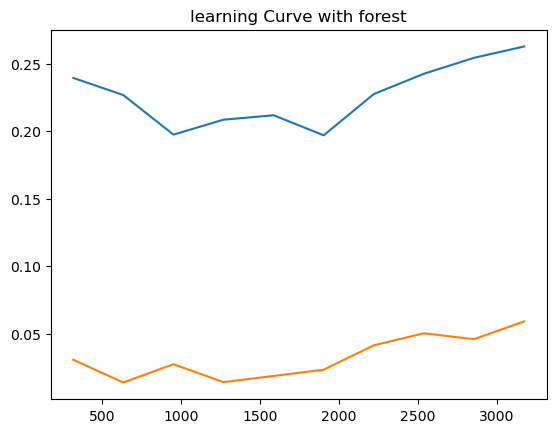

In [150]:
N,train_score,val_score= learning_curve(model_forest,robust_train,target_train.values.ravel(), cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
plt.figure()
plt.title("learning Curve with forest")
plt.plot(N,train_score.mean(axis=1),label='train score')
plt.plot(N,val_score.mean(axis=1),label='val score')
plt.show


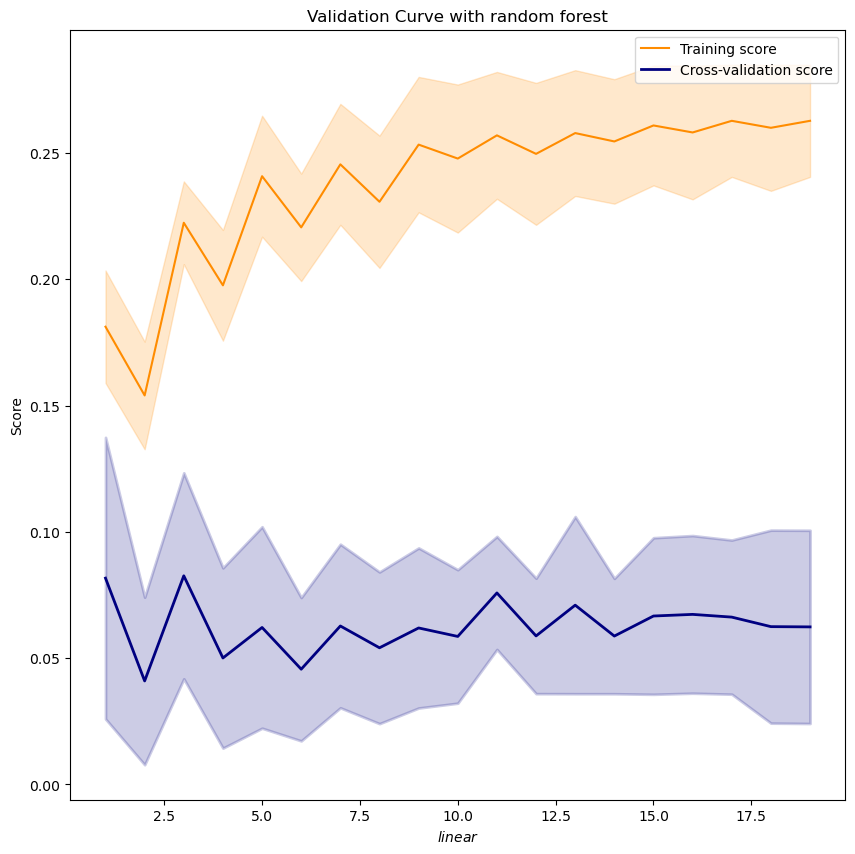

In [149]:
k=np.arange(1,20)
train_score,val_score=validation_curve(model_forest,
                                       robust_train,
                                       target_train,
                                       cv=5,scoring='f1',
                                       param_name='n_estimators',
                                       param_range=k)

plt.figure(figsize=(10,10))
plt.title("Validation Curve with random forest")
plt.xlabel(r"$linear$")
plt.ylabel("Score")

lw = 2
param_range=k
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)
plt.plot(
    param_range, train_score_mean, label="Training score", color="darkorange", 
)
plt.fill_between(
    param_range,
    train_score_mean - train_score_std,
    train_score_mean + train_score_std,
    alpha=0.2,
    color="darkorange",
   # lw=lw,
)
plt.plot(
    param_range,val_score_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    val_score_mean - val_score_std,
    val_score_mean + val_score_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()


In [ ]:
param_grid={'knnimputer__n_neighbors' :np.arange(1,20),'KNeighborsClassifier': k,'metric':['f1','f1_macro','f1_micro','recall','recall_macro','recall_micro','precision','precision_macro','precision_micro']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid ,cv =5,scoring='f1')
model=grid.estimator
model.fit(df_robust_train,df_target_train)
model.score(df_robust_test,df_target_test)
